In [1]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
from pylab import rcParams
import statsmodels.api as sm
import warnings
from pyramid.arima import auto_arima

warnings.filterwarnings('ignore')
plt.style.use('bmh')
%matplotlib inline

In [2]:
data = pd.read_csv('../raw data/LTC-USD_hourly.csv')

In [3]:
# data.head()

In [4]:
# data.tail()

In [5]:
data = data[['time_period_start', 'price_close']]

In [6]:
# data

In [7]:
data['time_period_start'] = pd.to_datetime(data['time_period_start'])

In [8]:
data = data.set_index('time_period_start')

In [9]:
data = data.resample('H').mean()

In [10]:
np.where(np.isnan(data))

(array([], dtype=int64), array([], dtype=int64))

In [11]:
data.index

DatetimeIndex(['2019-04-01 00:00:00', '2019-04-01 01:00:00',
               '2019-04-01 02:00:00', '2019-04-01 03:00:00',
               '2019-04-01 04:00:00', '2019-04-01 05:00:00',
               '2019-04-01 06:00:00', '2019-04-01 07:00:00',
               '2019-04-01 08:00:00', '2019-04-01 09:00:00',
               ...
               '2019-04-30 14:00:00', '2019-04-30 15:00:00',
               '2019-04-30 16:00:00', '2019-04-30 17:00:00',
               '2019-04-30 18:00:00', '2019-04-30 19:00:00',
               '2019-04-30 20:00:00', '2019-04-30 21:00:00',
               '2019-04-30 22:00:00', '2019-04-30 23:00:00'],
              dtype='datetime64[ns]', name='time_period_start', length=720, freq='H')

In [12]:
y = data['price_close']

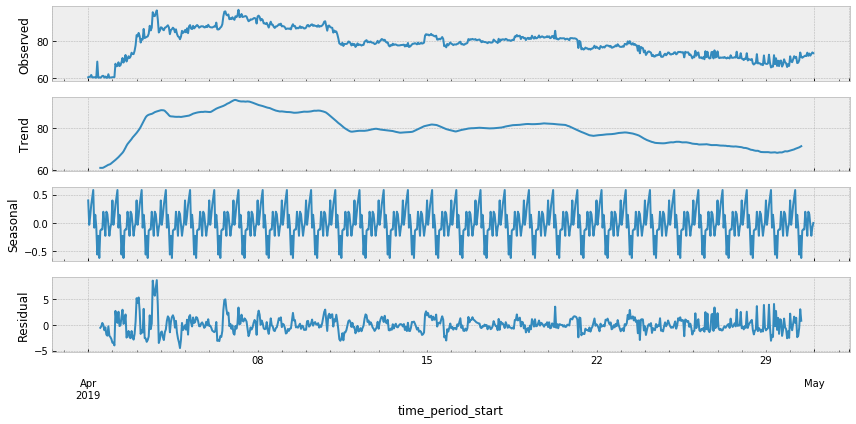

In [13]:
rcParams['figure.figsize'] = 12, 6

decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()

In [14]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.diagnostic import acorr_ljungbox

def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = timeseries.resample('D').mean()
    rolstd = timeseries.resample('D').std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
    
    print()
    #Perform Ljung-Box test:
    print('Results of Ljung-Box Test:')
    lbtest = acorr_ljungbox(timeseries, lags=5)
    for i in range(5):
        print('Largest Lag Included:{} Test Statistic={}  p-value={}'.format(i, lbtest[0][i], lbtest[1][i]))

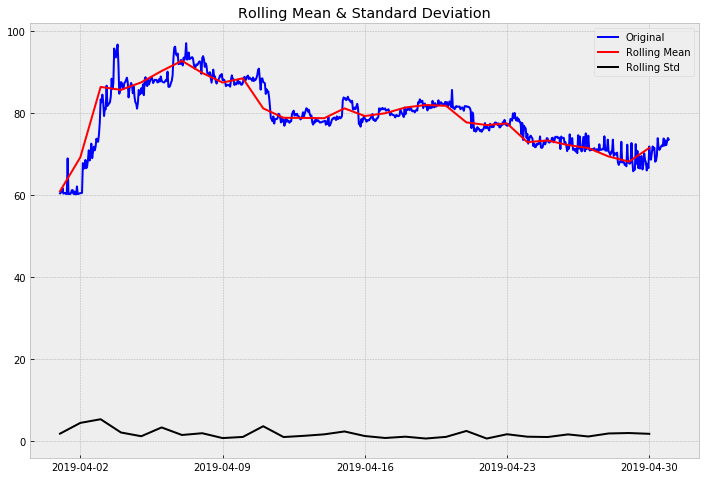

Results of Dickey-Fuller Test:
Test Statistic                  -3.101750
p-value                          0.026424
#Lags Used                      19.000000
Number of Observations Used    700.000000
Critical Value (1%)             -3.439726
Critical Value (5%)             -2.865678
Critical Value (10%)            -2.568973
dtype: float64

Results of Ljung-Box Test:
Largest Lag Included:0 Test Statistic=685.4562535905624  p-value=4.3489522530639413e-151
Largest Lag Included:1 Test Statistic=1355.709018207538  p-value=4.088153207101184e-295
Largest Lag Included:2 Test Statistic=2010.2256452548584  p-value=0.0
Largest Lag Included:3 Test Statistic=2651.2445491440208  p-value=0.0
Largest Lag Included:4 Test Statistic=3278.5869750613715  p-value=0.0


In [15]:
test_stationarity(y)

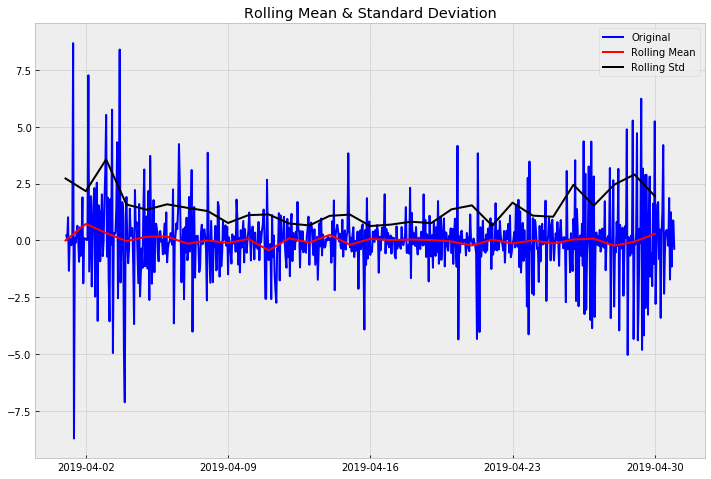

Results of Dickey-Fuller Test:
Test Statistic                  -4.102680
p-value                          0.000959
#Lags Used                      20.000000
Number of Observations Used    698.000000
Critical Value (1%)             -3.439753
Critical Value (5%)             -2.865690
Critical Value (10%)            -2.568980
dtype: float64

Results of Ljung-Box Test:
Largest Lag Included:0 Test Statistic=80.8172672878139  p-value=2.475850846835924e-19
Largest Lag Included:1 Test Statistic=80.87442788284983  p-value=2.7437284194664993e-18
Largest Lag Included:2 Test Statistic=81.41316259258372  p-value=1.5271553303020004e-17
Largest Lag Included:3 Test Statistic=81.43076601966595  p-value=8.666227101098014e-17
Largest Lag Included:4 Test Statistic=81.84527139882464  p-value=3.4486867377922923e-16


In [16]:
test_stationarity(y.diff(1).dropna())

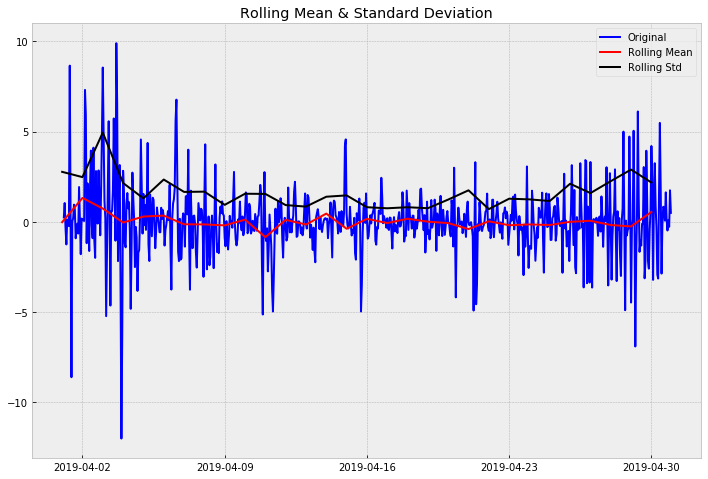

Results of Dickey-Fuller Test:
Test Statistic                  -5.172084
p-value                          0.000010
#Lags Used                      16.000000
Number of Observations Used    701.000000
Critical Value (1%)             -3.439713
Critical Value (5%)             -2.865672
Critical Value (10%)            -2.568970
dtype: float64

Results of Ljung-Box Test:
Largest Lag Included:0 Test Statistic=47.01798444171135  p-value=7.03383012919332e-12
Largest Lag Included:1 Test Statistic=95.21175841320976  p-value=2.1136318976015968e-21
Largest Lag Included:2 Test Statistic=96.25778045914814  p-value=9.90809200193459e-21
Largest Lag Included:3 Test Statistic=96.32782634549778  p-value=5.947366814451704e-20
Largest Lag Included:4 Test Statistic=96.4183144262126  p-value=3.0028147819826915e-19


In [17]:
test_stationarity(y.diff(2).dropna())

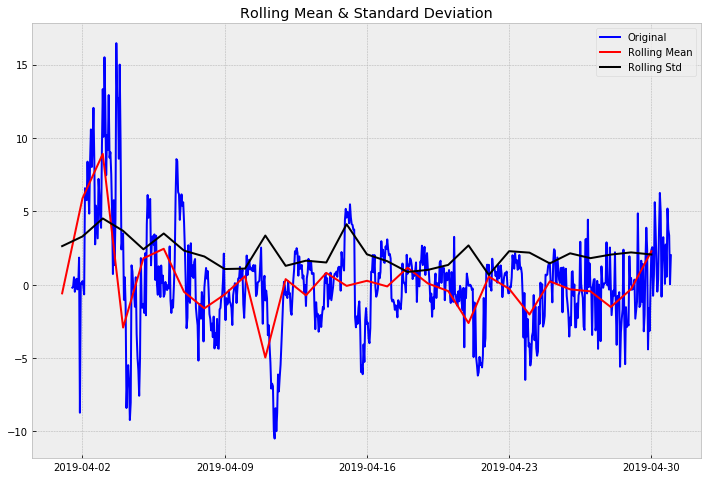

Results of Dickey-Fuller Test:
Test Statistic                  -4.997759
p-value                          0.000022
#Lags Used                      19.000000
Number of Observations Used    688.000000
Critical Value (1%)             -3.439891
Critical Value (5%)             -2.865750
Critical Value (10%)            -2.569012
dtype: float64

Results of Ljung-Box Test:
Largest Lag Included:0 Test Statistic=455.56052552974086  p-value=4.446391205353894e-101
Largest Lag Included:1 Test Statistic=819.64436050439  p-value=1.0386962289997504e-178
Largest Lag Included:2 Test Statistic=1133.6518546852649  p-value=1.820497370848204e-245
Largest Lag Included:3 Test Statistic=1384.4279832910472  p-value=1.644941478951857e-298
Largest Lag Included:4 Test Statistic=1586.7326600690828  p-value=0.0


In [18]:
test_stationarity(y.diff(12).dropna())

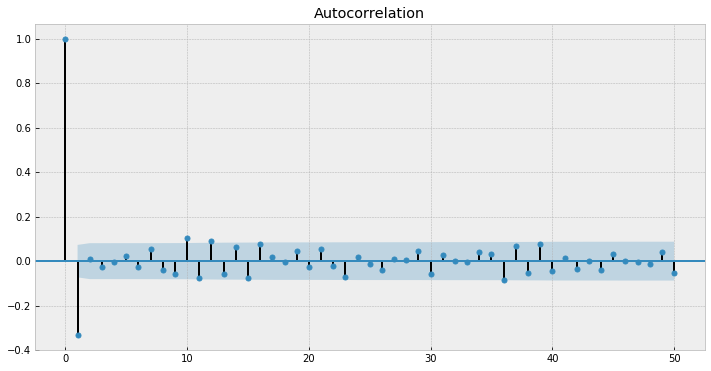

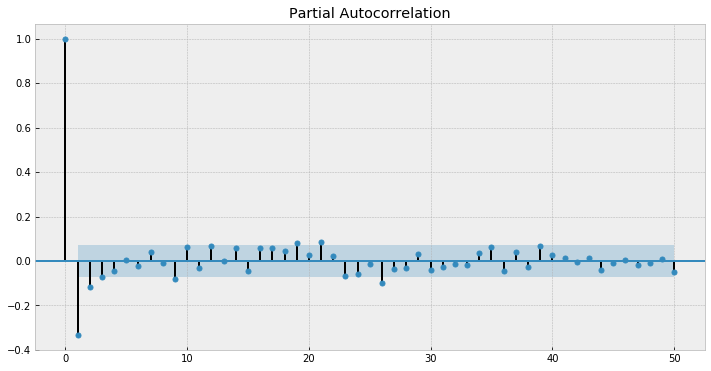

In [19]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
 
acf = plot_acf(y.diff(1).dropna(), lags=50)
pacf = plot_pacf(y.diff(1).dropna(), lags=50)

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3888      0.023    -16.894      0.000      -0.434      -0.344
sigma2         2.2782      0.057     39.874      0.000       2.166       2.390
2629.1636777069502


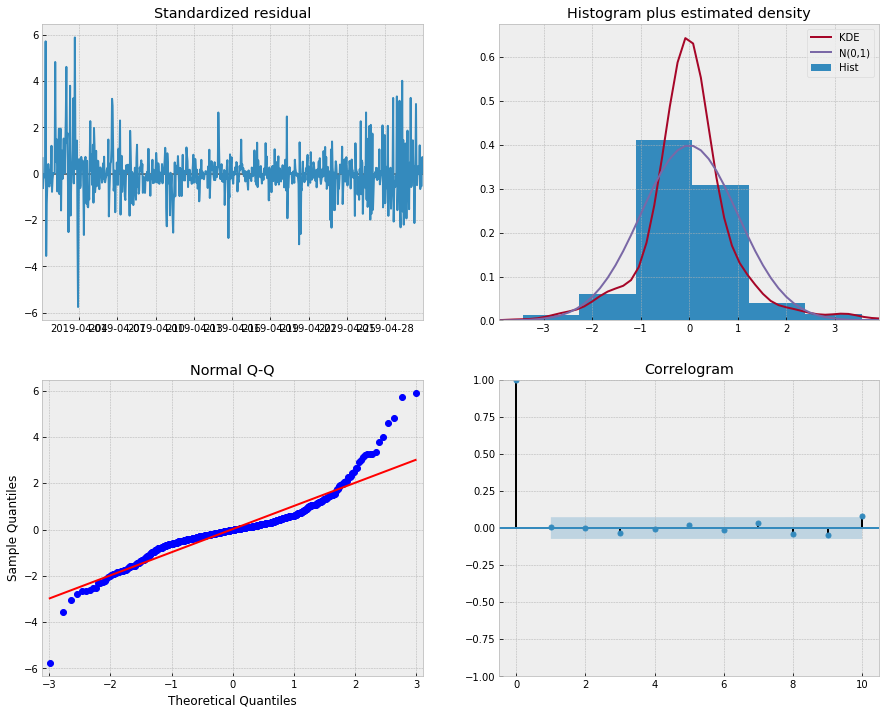

In [20]:
mod_baseline = sm.tsa.statespace.SARIMAX(y,
                                order=(0, 1, 1),
                                seasonal_order = (0, 0, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_baseline = mod_baseline.fit()

print(results_baseline.summary().tables[1])
print(results_baseline.aic)
b = results_baseline.plot_diagnostics(figsize=(15, 12))

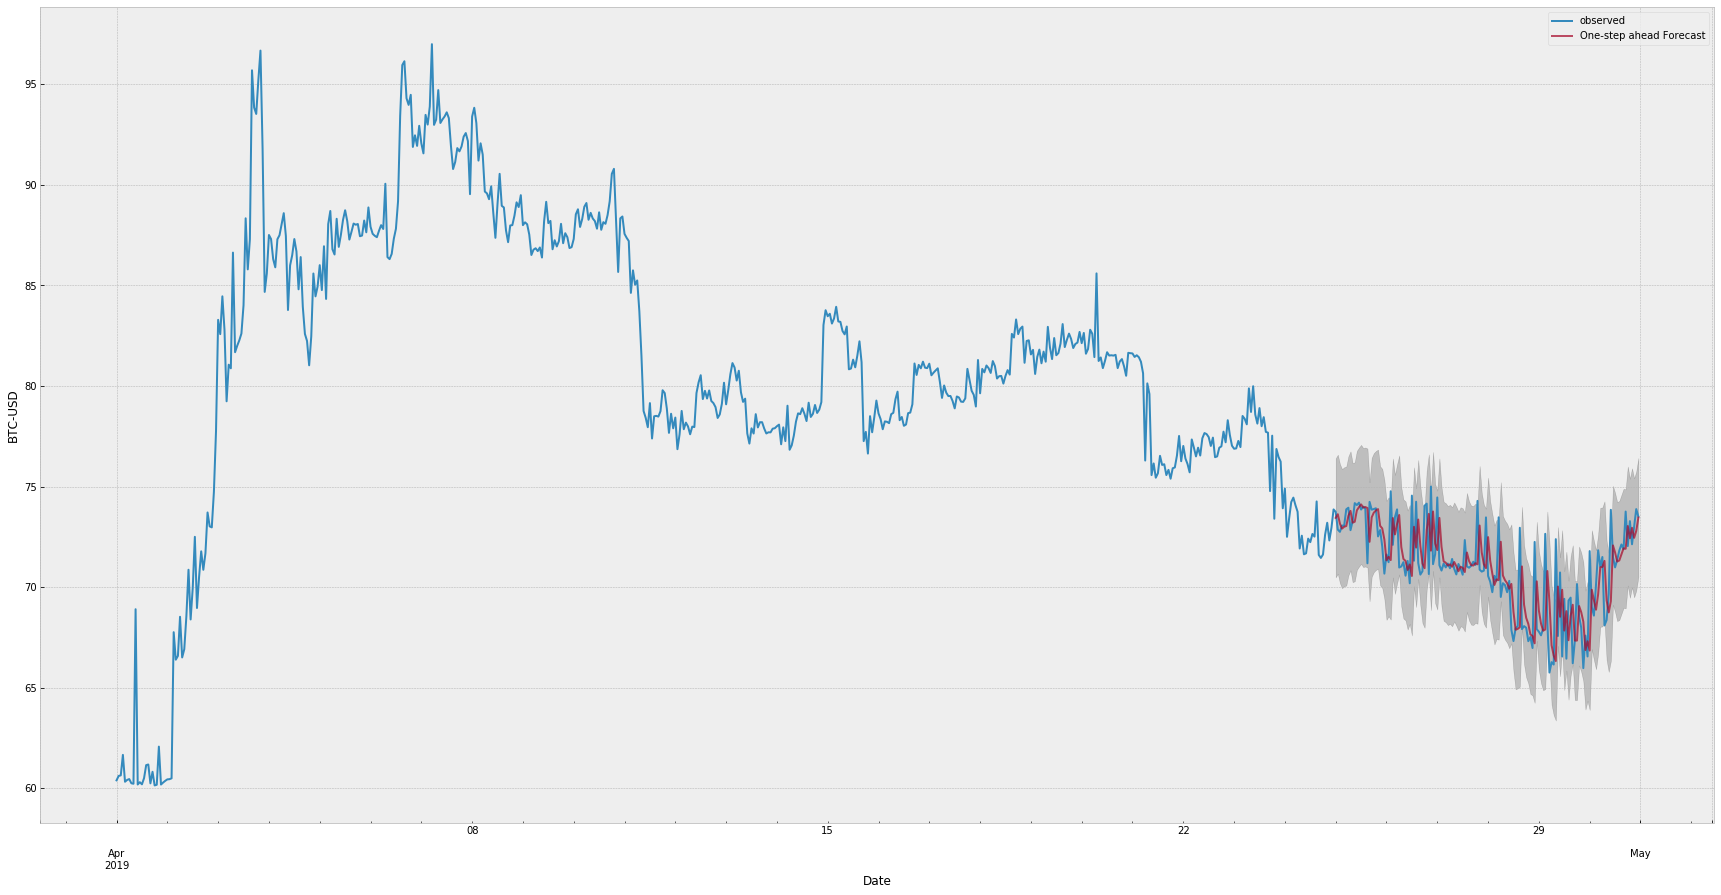

In [21]:
pred = results_baseline.get_prediction(start=y.index[int(len(y)*0.8)], end=y.index[-1], dynamic=False)
pred_ci = pred.conf_int()

ax = y.plot(label='observed', figsize=(30, 15))
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('BTC-USD')
plt.legend()

In [22]:
y_forecasted = pred.predicted_mean
y_truth = y[int(len(y)*0.8):]
y_train = y[:int(len(y)*0.8)]

# MSE
mse = ((y_truth - y_forecasted) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 4)))

# OSR2
OSR2 = 1 - np.sum((y_truth - y_forecasted) ** 2)/np.sum((y_truth - np.average(y_train)) ** 2)
print('The out-of-sample R2 of our model is {}'.format(round(OSR2, 4)))

The Mean Squared Error of our forecasts is 3.2303
The out-of-sample R2 of our model is 0.9699


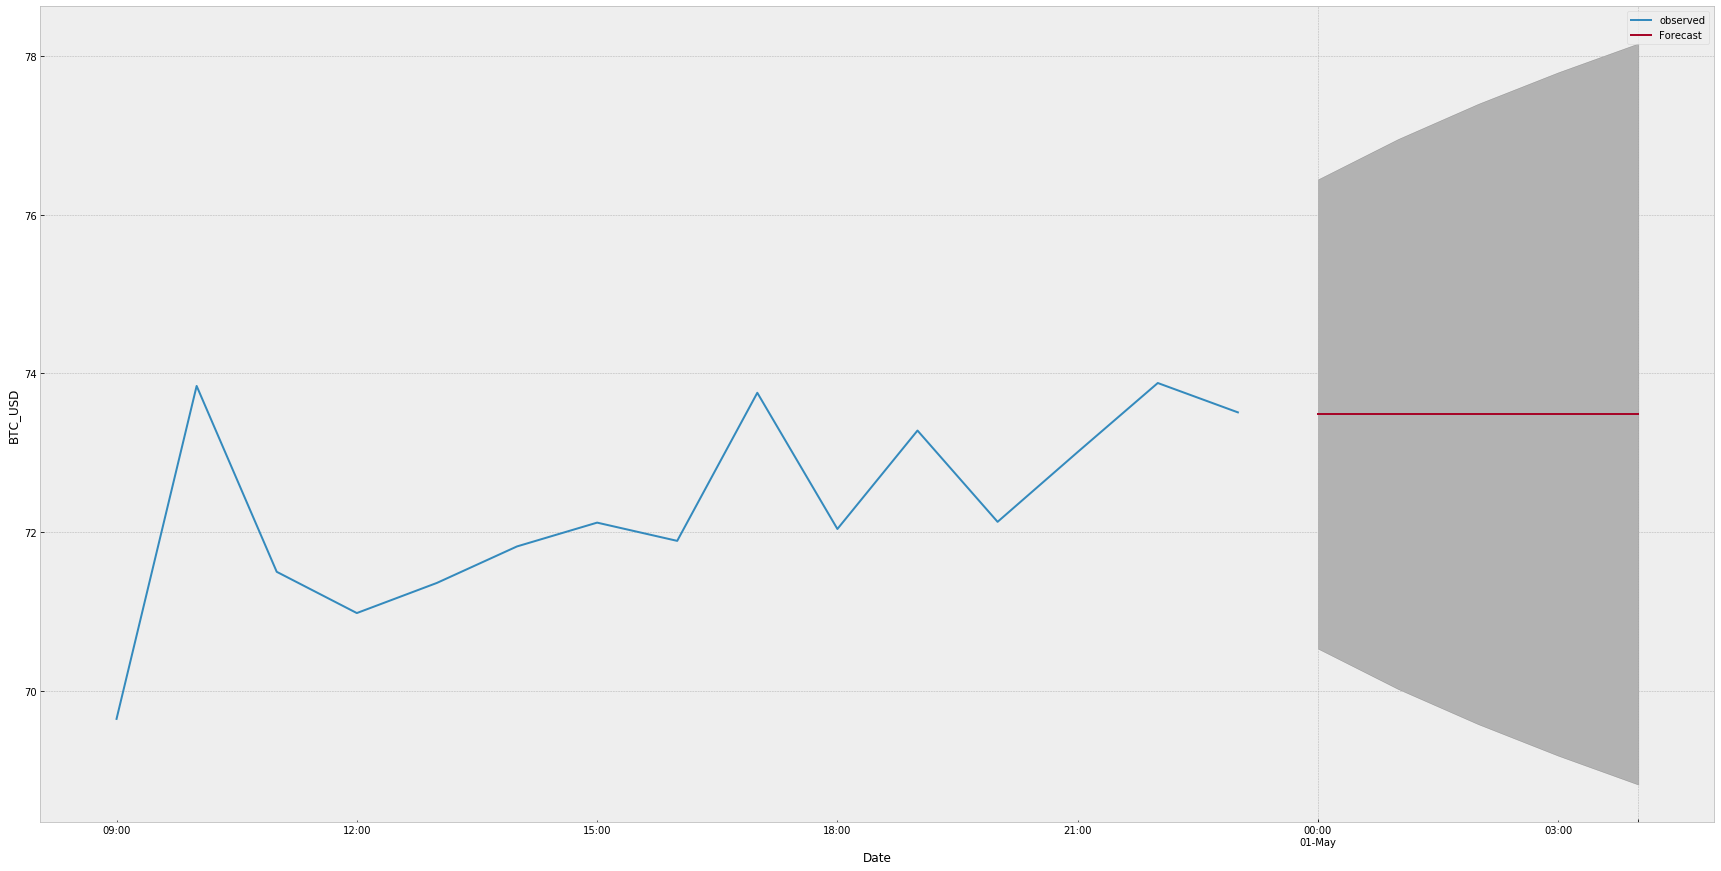

In [23]:
# Forcast the future
pred_uc = results_baseline.get_forecast(steps=5)
pred_ci = pred_uc.conf_int()

ax = y[-15:].plot(label='observed', figsize=(30, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('BTC_USD')

plt.legend()

### Build an Advanced Model by Grid Search

In [24]:
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 0, 2, 12)
SARIMAX: (0, 0, 2) x (0, 1, 0, 12)
SARIMAX: (0, 0, 2) x (0, 1, 1, 12)


In [25]:
AIC_list = pd.DataFrame({}, columns=['param','param_seasonal','AIC'])

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                           order = param,
                                           seasonal_order = param_seasonal,
                                           enforce_stationarity = False,
                                           enforce_invertibility = False)
            
            results = mod.fit()
            
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            temp = pd.DataFrame([[ param ,  param_seasonal , results.aic ]], columns=['param','param_seasonal','AIC'])
            AIC_list = AIC_list.append( temp, ignore_index=True)

        except:
            continue

print('Finished...')

AIC_list = AIC_list.dropna()
m = np.amin(AIC_list['AIC'].values) # Find the minimum value in AIC
l = AIC_list['AIC'].tolist().index(m) # Find the index number of the lowest AIC
Min_AIC_list = AIC_list.iloc[l,:]

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:8333.780750041773
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:7289.46391054332
ARIMA(0, 0, 0)x(0, 0, 2, 12)12 - AIC:6391.031705285763
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:3736.6994525259606
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:3661.6664316028855
ARIMA(0, 0, 0)x(0, 1, 2, 12)12 - AIC:3554.5936942166954
ARIMA(0, 0, 0)x(0, 2, 0, 12)12 - AIC:4047.110124794879
ARIMA(0, 0, 0)x(0, 2, 1, 12)12 - AIC:3615.918551235677
ARIMA(0, 0, 0)x(0, 2, 2, 12)12 - AIC:3531.6949278616403
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:3742.5088380232155
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:3721.8777971812565
ARIMA(0, 0, 0)x(1, 0, 2, 12)12 - AIC:3659.321688247451
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:3668.8336204473226
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:3652.5631925564517
ARIMA(0, 0, 0)x(1, 1, 2, 12)12 - AIC:3480.959859692881
ARIMA(0, 0, 0)x(1, 2, 0, 12)12 - AIC:3852.1780109493184
ARIMA(0, 0, 0)x(1, 2, 1, 12)12 - AIC:3616.4509684782847
ARIMA(0, 0, 0)x(1, 2, 2, 12)12 - AIC:3539.2772879619015


ARIMA(0, 1, 2)x(1, 1, 1, 12)12 - AIC:2536.7656059232386
ARIMA(0, 1, 2)x(1, 1, 2, 12)12 - AIC:2476.33302841929
ARIMA(0, 1, 2)x(1, 2, 0, 12)12 - AIC:3242.8396728526095
ARIMA(0, 1, 2)x(1, 2, 1, 12)12 - AIC:2774.2187082896753
ARIMA(0, 1, 2)x(1, 2, 2, 12)12 - AIC:2522.5294410274737
ARIMA(0, 1, 2)x(2, 0, 0, 12)12 - AIC:2517.199262278209
ARIMA(0, 1, 2)x(2, 0, 1, 12)12 - AIC:2514.3442726003905
ARIMA(0, 1, 2)x(2, 0, 2, 12)12 - AIC:2479.6120483773866
ARIMA(0, 1, 2)x(2, 1, 0, 12)12 - AIC:2668.2547375572863
ARIMA(0, 1, 2)x(2, 1, 1, 12)12 - AIC:2522.853505068928
ARIMA(0, 1, 2)x(2, 1, 2, 12)12 - AIC:2478.33898473547
ARIMA(0, 1, 2)x(2, 2, 0, 12)12 - AIC:3021.3222960310322
ARIMA(0, 1, 2)x(2, 2, 1, 12)12 - AIC:2683.481552849851
ARIMA(0, 1, 2)x(2, 2, 2, 12)12 - AIC:2523.522290157009
ARIMA(0, 2, 0)x(0, 0, 0, 12)12 - AIC:3429.7409595242716
ARIMA(0, 2, 0)x(0, 0, 1, 12)12 - AIC:3304.139101078186
ARIMA(0, 2, 0)x(0, 0, 2, 12)12 - AIC:3251.595260322546
ARIMA(0, 2, 0)x(0, 1, 0, 12)12 - AIC:3742.7951900835947
AR

ARIMA(1, 0, 1)x(2, 2, 2, 12)12 - AIC:2520.344326998713
ARIMA(1, 0, 2)x(0, 0, 0, 12)12 - AIC:2633.1165440431773
ARIMA(1, 0, 2)x(0, 0, 1, 12)12 - AIC:2546.848956991992
ARIMA(1, 0, 2)x(0, 0, 2, 12)12 - AIC:2509.4741364885167
ARIMA(1, 0, 2)x(0, 1, 0, 12)12 - AIC:2969.7915037192715
ARIMA(1, 0, 2)x(0, 1, 1, 12)12 - AIC:2562.509344186353
ARIMA(1, 0, 2)x(0, 1, 2, 12)12 - AIC:2476.9578638395383
ARIMA(1, 0, 2)x(0, 2, 0, 12)12 - AIC:3605.696754154158
ARIMA(1, 0, 2)x(0, 2, 1, 12)12 - AIC:2895.4591943159817
ARIMA(1, 0, 2)x(0, 2, 2, 12)12 - AIC:2542.67098370473
ARIMA(1, 0, 2)x(1, 0, 0, 12)12 - AIC:2553.5746070654877
ARIMA(1, 0, 2)x(1, 0, 1, 12)12 - AIC:2548.522987149091
ARIMA(1, 0, 2)x(1, 0, 2, 12)12 - AIC:2494.9047510173277
ARIMA(1, 0, 2)x(1, 1, 0, 12)12 - AIC:2773.33491972426
ARIMA(1, 0, 2)x(1, 1, 1, 12)12 - AIC:2543.9706524806156
ARIMA(1, 0, 2)x(1, 1, 2, 12)12 - AIC:2474.50456064051
ARIMA(1, 0, 2)x(1, 2, 0, 12)12 - AIC:3200.1742119787777
ARIMA(1, 0, 2)x(1, 2, 1, 12)12 - AIC:2778.1294484365408
ARI

ARIMA(1, 2, 1)x(1, 1, 0, 12)12 - AIC:2798.45666417965
ARIMA(1, 2, 1)x(1, 1, 1, 12)12 - AIC:2559.5845985404376
ARIMA(1, 2, 1)x(1, 1, 2, 12)12 - AIC:2497.119965201795
ARIMA(1, 2, 1)x(1, 2, 0, 12)12 - AIC:3246.5725358687905
ARIMA(1, 2, 1)x(1, 2, 1, 12)12 - AIC:2802.313423595522
ARIMA(1, 2, 1)x(1, 2, 2, 12)12 - AIC:2542.4759360155495
ARIMA(1, 2, 1)x(2, 0, 0, 12)12 - AIC:2529.867220929407
ARIMA(1, 2, 1)x(2, 0, 1, 12)12 - AIC:2525.9271063718097
ARIMA(1, 2, 1)x(2, 0, 2, 12)12 - AIC:2508.1432093653025
ARIMA(1, 2, 1)x(2, 1, 0, 12)12 - AIC:2678.254461869299
ARIMA(1, 2, 1)x(2, 1, 1, 12)12 - AIC:2509.519971253651
ARIMA(1, 2, 1)x(2, 1, 2, 12)12 - AIC:2499.12071319266
ARIMA(1, 2, 1)x(2, 2, 0, 12)12 - AIC:3026.632529104696
ARIMA(1, 2, 1)x(2, 2, 1, 12)12 - AIC:2694.7212455170056
ARIMA(1, 2, 1)x(2, 2, 2, 12)12 - AIC:2543.5440536302995
ARIMA(1, 2, 2)x(0, 0, 0, 12)12 - AIC:2630.281849189553
ARIMA(1, 2, 2)x(0, 0, 1, 12)12 - AIC:2544.856678545098
ARIMA(1, 2, 2)x(0, 0, 2, 12)12 - AIC:2497.5677933941806
ARIM

ARIMA(2, 1, 0)x(2, 2, 1, 12)12 - AIC:2673.595844120655
ARIMA(2, 1, 0)x(2, 2, 2, 12)12 - AIC:2532.2747960899123
ARIMA(2, 1, 1)x(0, 0, 0, 12)12 - AIC:2632.9287641293577
ARIMA(2, 1, 1)x(0, 0, 1, 12)12 - AIC:2546.4839963520735
ARIMA(2, 1, 1)x(0, 0, 2, 12)12 - AIC:2510.0889431864425
ARIMA(2, 1, 1)x(0, 1, 0, 12)12 - AIC:2997.382555570978
ARIMA(2, 1, 1)x(0, 1, 1, 12)12 - AIC:2570.3006321820285
ARIMA(2, 1, 1)x(0, 1, 2, 12)12 - AIC:2486.3644553121176
ARIMA(2, 1, 1)x(0, 2, 0, 12)12 - AIC:3654.9524707687924
ARIMA(2, 1, 1)x(0, 2, 1, 12)12 - AIC:2924.1477771958807
ARIMA(2, 1, 1)x(0, 2, 2, 12)12 - AIC:2555.056303825075
ARIMA(2, 1, 1)x(1, 0, 0, 12)12 - AIC:2547.95904060249
ARIMA(2, 1, 1)x(1, 0, 1, 12)12 - AIC:2548.2216713031335
ARIMA(2, 1, 1)x(1, 0, 2, 12)12 - AIC:2493.126692131965
ARIMA(2, 1, 1)x(1, 1, 0, 12)12 - AIC:2773.213527542825
ARIMA(2, 1, 1)x(1, 1, 1, 12)12 - AIC:2553.5181778602146
ARIMA(2, 1, 1)x(1, 1, 2, 12)12 - AIC:2483.734031211893
ARIMA(2, 1, 1)x(1, 2, 0, 12)12 - AIC:3196.8058527302937


### Min_AIC_list ### 
param                 (1, 0, 2)
param_seasonal    (1, 1, 2, 12)
AIC                      2474.5
Name: 311, dtype: object
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9835      0.004    231.730      0.000       0.975       0.992
ma.L1         -0.3610      0.029    -12.390      0.000      -0.418      -0.304
ma.L2         -0.0276      0.035     -0.796      0.426      -0.096       0.040
ar.S.L12      -0.3443      0.149     -2.313      0.021      -0.636      -0.053
ma.S.L12      -0.5293      0.152     -3.472      0.001      -0.828      -0.231
ma.S.L24      -0.4000      0.144     -2.775      0.006      -0.683      -0.117
sigma2         2.1148      0.074     28.505      0.000       1.969       2.260


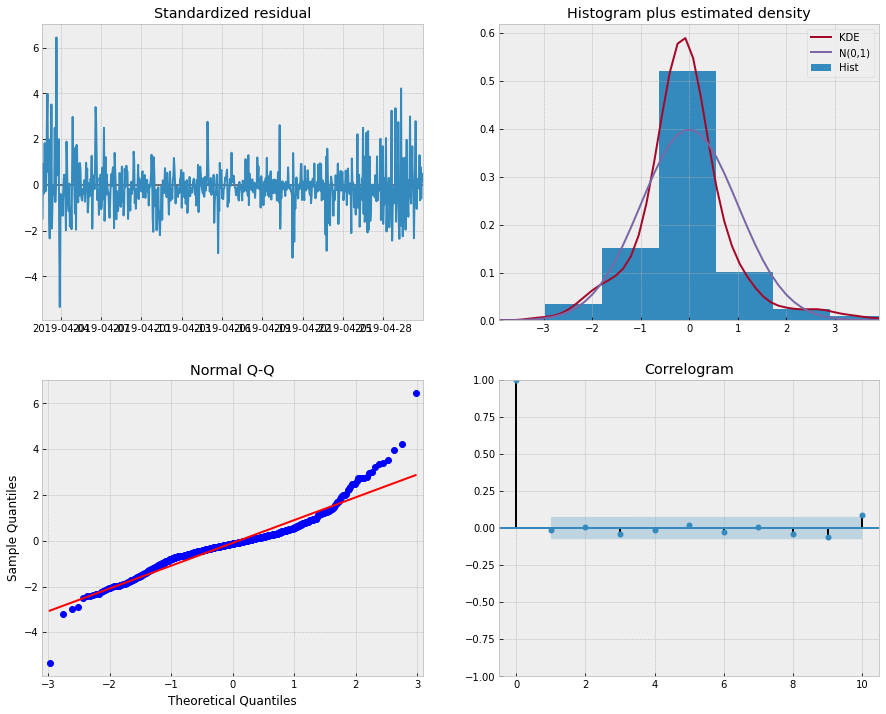

In [26]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=Min_AIC_list['param'],
                                seasonal_order=Min_AIC_list['param_seasonal'],
                                enforce_stationarity=False,
                                 enforce_invertibility=False)
results = mod.fit()

print("### Min_AIC_list ### \n{}".format(Min_AIC_list))

print(results.summary().tables[1])
dia = results.plot_diagnostics(figsize=(15, 12))

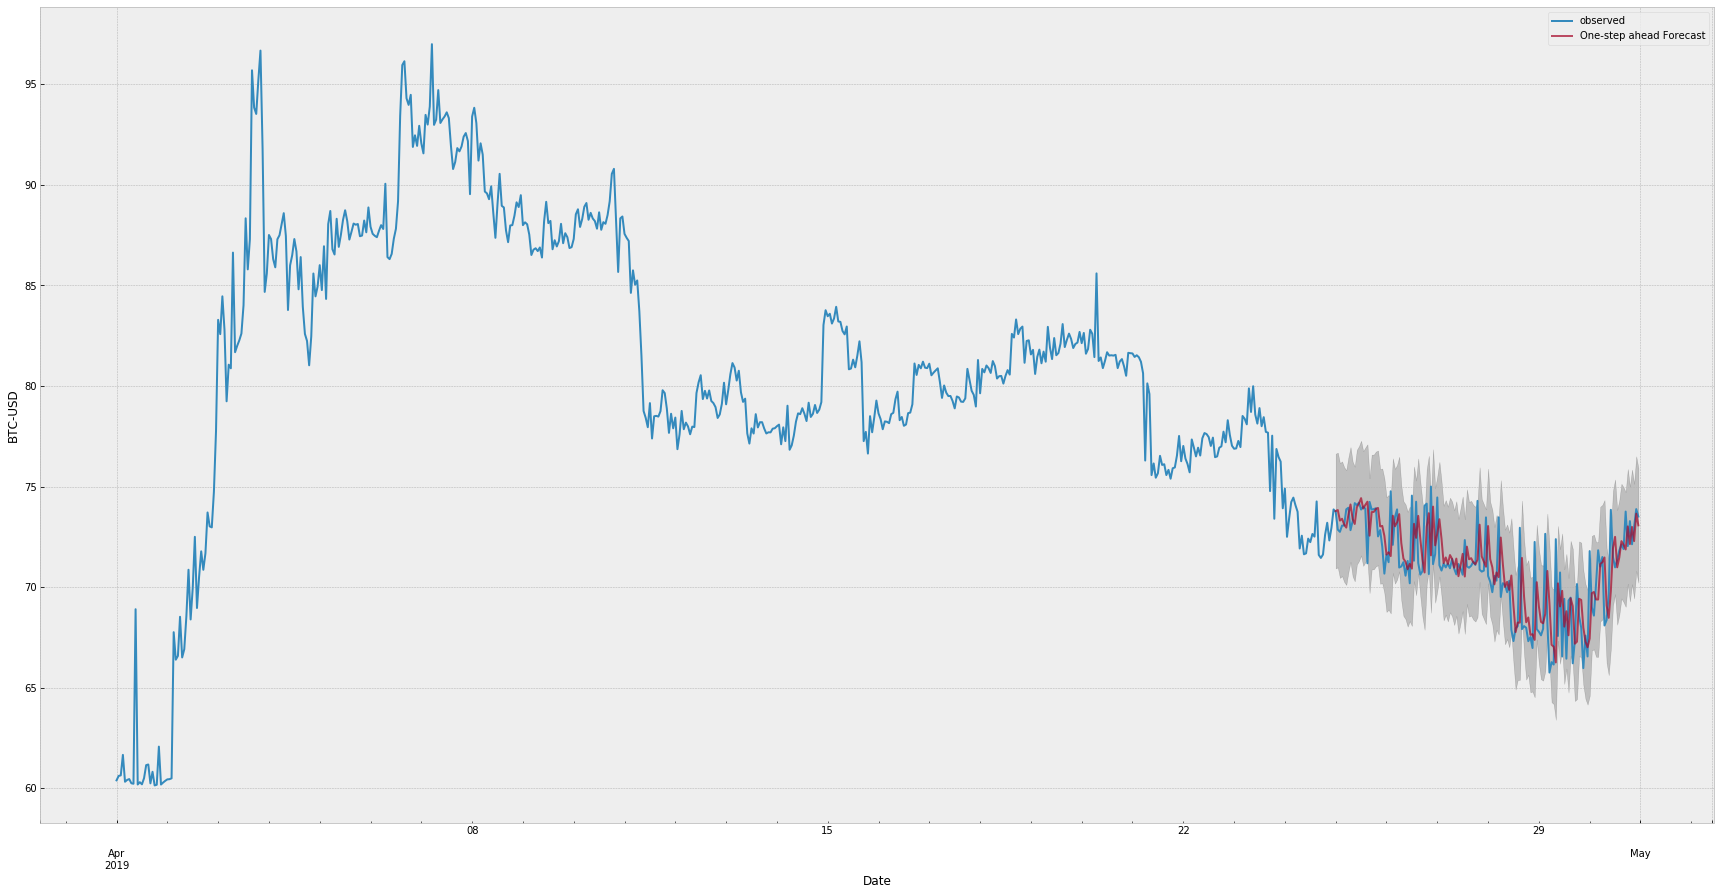

In [27]:
pred = results.get_prediction(start=y.index[int(len(y)*0.8)], end=y.index[-1], dynamic=False)
pred_ci = pred.conf_int()

ax = y.plot(label='observed', figsize=(30, 15))
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('BTC-USD')
plt.legend()

In [28]:
y_forecasted = pred.predicted_mean
y_truth = y[int(len(y)*0.8):]
y_train = y[:int(len(y)*0.8)]

# MSE
mse = ((y_truth - y_forecasted) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 4)))

# OSR2
OSR2 = 1 - np.sum((y_truth - y_forecasted) ** 2)/np.sum((y_truth - np.average(y_train)) ** 2)
print('The out-of-sample R2 of our model is {}'.format(round(OSR2, 4)))

The Mean Squared Error of our forecasts is 3.1963
The out-of-sample R2 of our model is 0.9702


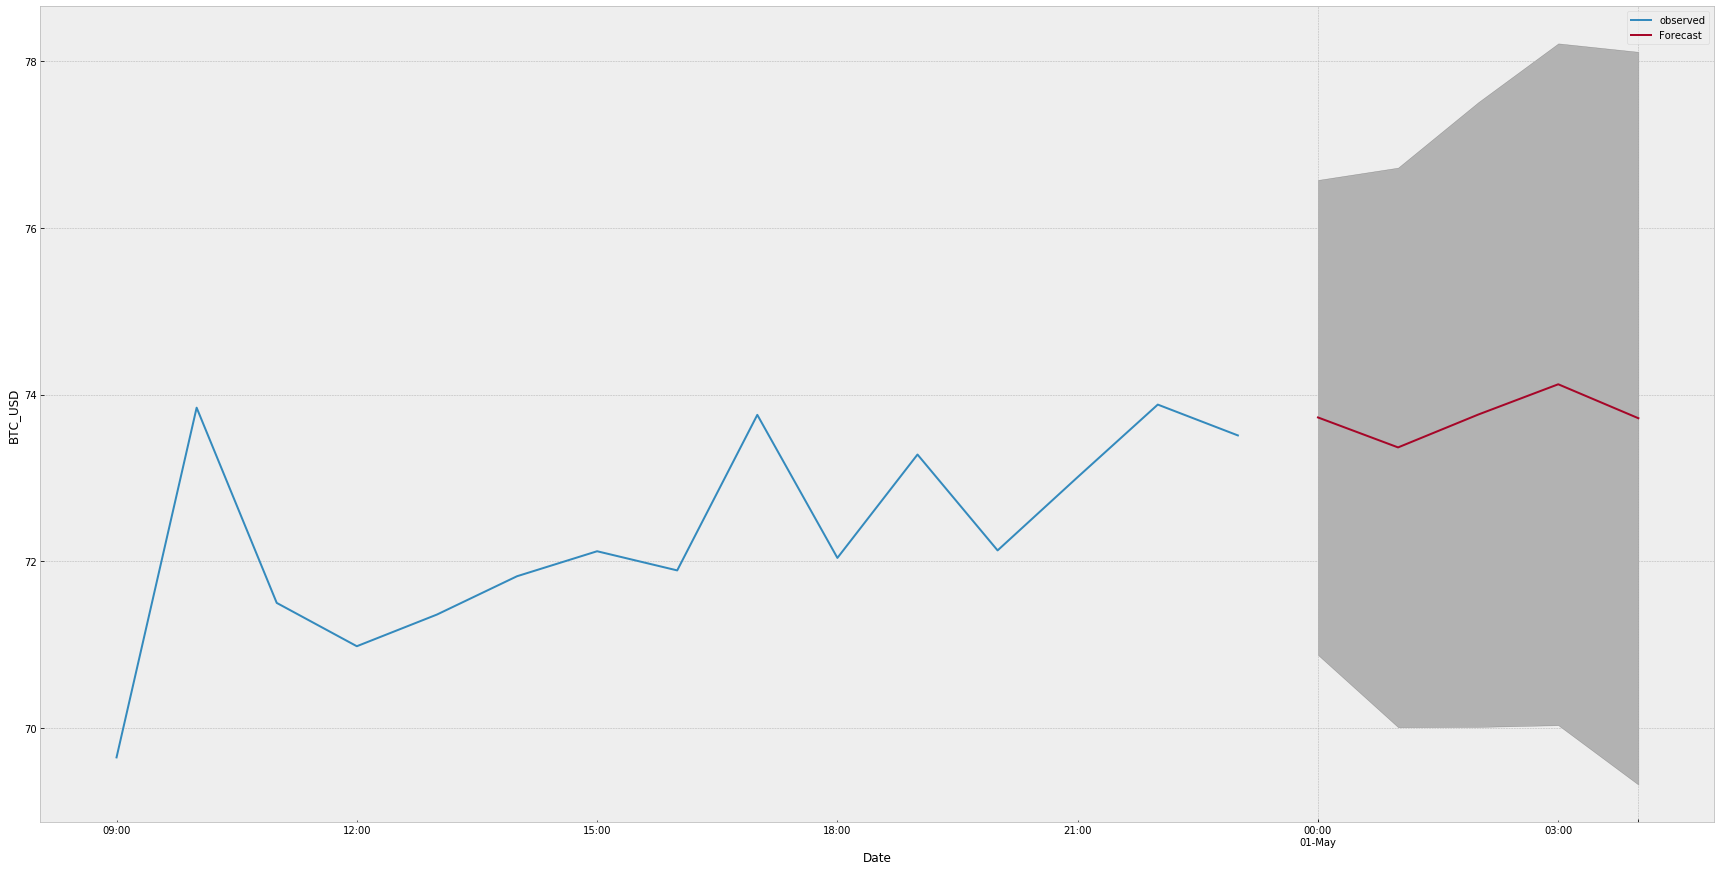

In [29]:
# Forcast the future
pred_uc = results.get_forecast(steps=5)
pred_ci = pred_uc.conf_int()

ax = y[-15:].plot(label='observed', figsize=(30, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('BTC_USD')

plt.legend()